In [19]:
!pip install ultralytics

In [20]:
# Importing essential libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from IPython.display import Video
import ultralytics
from ultralytics import YOLO
sns.set_style('darkgrid')
import pathlib # library used for working with files and directories and help in navigating and interacting with file system. Is more modern, flexible and object-oriented for path manipulation.
import glob # library used for pattern matching in filenames, specifically to retrive files and directories based on wild card patterns.
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


**Computer vision is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information**

*Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.*

In [21]:
# Configure for visual appearance of seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

Dataset

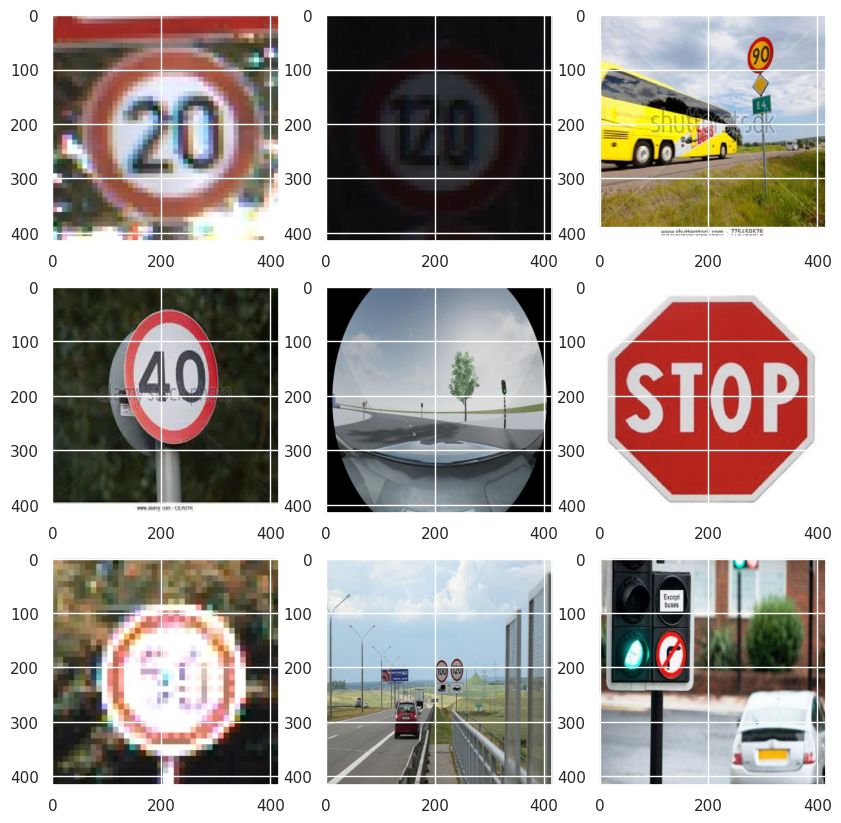

In [22]:
# Displaying some images from Trainset

Image_dir = '/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train/images'

num_images = 9
image_files = os.listdir(Image_dir)

# Randomly select num_images from dataset
random_images = random.sample(image_files, num_images)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = Image.open(os.path.join(Image_dir, random_images[i]))
    ax.imshow(img)

In [23]:
# Get image size

img = cv2.imread("/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
img.shape

(416, 416, 3)


image 1/1 /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg: 640x640 (no detections), 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


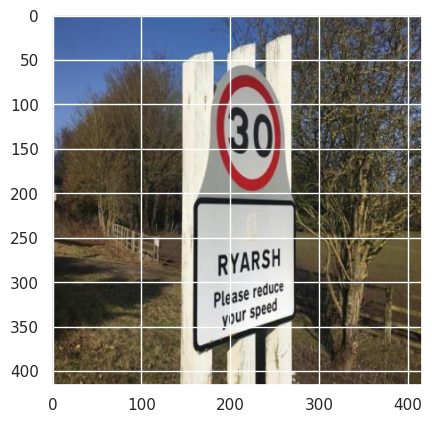

In [24]:
# Trying pre-trained YoLoV8 for detecting traffic signs
# Using a pretrained YoLoV8n model
model = YOLO('yolov8n.pt')

# Using the model to detect object
image = '/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg'

prediction = model.predict(source = image, imgsz = 640, conf = 0.5)

# Show results
plot = prediction[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)

**Training Step**

In [25]:
!pip install --upgrade ultralytics ray

In [26]:
final_model = YOLO('yolov8n.pt')

# Training the fianl_model
results = final_model.train(data = '/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/data.yaml', epochs = 30, batch = -1 , optimizer = 'auto')


Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:05<00:00, 633.54it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 561.26it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.42G     0.9181      3.845      1.254          4        640: 100%|██████████| 50/50 [00:41<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944     0.0353      0.767      0.142      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.35G     0.7497       2.68      1.102          3        640: 100%|██████████| 50/50 [00:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        801        944      0.389      0.388      0.302       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.35G     0.7411      2.276      1.086          2        640: 100%|██████████| 50/50 [00:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.315      0.426      0.344      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.35G      0.713      1.933      1.061          3        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944       0.52      0.581      0.596       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.37G     0.6941      1.613      1.053          4        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        801        944      0.722      0.622      0.706      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.35G     0.6708      1.433      1.035          2        640: 100%|██████████| 50/50 [00:39<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        801        944      0.789      0.703      0.795      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.35G     0.6478      1.252      1.024          2        640: 100%|██████████| 50/50 [00:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944       0.83      0.749      0.837      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.37G     0.6449      1.169      1.014          5        640: 100%|██████████| 50/50 [00:40<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.877      0.704      0.835      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.37G     0.6346      1.089      1.009          4        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.899      0.804      0.887      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.34G     0.6446      1.059      1.003          3        640: 100%|██████████| 50/50 [00:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.893      0.759      0.878      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.35G      0.616     0.9768     0.9924          5        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944       0.91      0.812      0.899      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.37G      0.632     0.9636      1.026          2        640: 100%|██████████| 50/50 [00:40<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        801        944      0.901      0.811      0.894       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       9.4G     0.6082     0.8817     0.9983          4        640: 100%|██████████| 50/50 [00:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.898      0.806      0.901      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       9.4G     0.5846     0.8586     0.9868          6        640: 100%|██████████| 50/50 [00:41<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944      0.911      0.804      0.907      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.34G     0.5901     0.8144     0.9925          4        640: 100%|██████████| 50/50 [00:42<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.908      0.842      0.917      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.35G     0.5807     0.7865      0.976          4        640: 100%|██████████| 50/50 [00:39<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        801        944      0.954      0.823      0.925      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.35G     0.5721     0.7653      0.976          1        640: 100%|██████████| 50/50 [00:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.944      0.834      0.923       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.34G     0.5897     0.7703     0.9943          3        640: 100%|██████████| 50/50 [00:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944       0.95      0.847      0.934      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.34G     0.5684     0.7242     0.9879          1        640: 100%|██████████| 50/50 [00:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.952      0.848      0.938      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.37G     0.5467     0.6955     0.9678          4        640: 100%|██████████| 50/50 [00:39<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.929      0.848      0.931      0.794


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.33G     0.5595     0.5464     0.9443          2        640: 100%|██████████| 50/50 [00:41<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.951      0.855      0.944      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.29G     0.5579     0.5205     0.9329          3        640: 100%|██████████| 50/50 [00:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        801        944      0.948      0.863      0.945      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.33G     0.5411     0.4837     0.9294          2        640: 100%|██████████| 50/50 [00:38<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.928       0.88      0.951      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.29G     0.5294     0.4682     0.9256          2        640: 100%|██████████| 50/50 [00:40<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.967      0.874      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       9.4G     0.5355     0.4481      0.923          3        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.943      0.897      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.33G      0.514     0.4342     0.9119          2        640: 100%|██████████| 50/50 [00:38<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        801        944      0.932        0.9      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.29G     0.5319     0.4291     0.9134          5        640: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944      0.951      0.893      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.29G     0.5047     0.4006     0.9093          2        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944       0.92      0.904      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.29G     0.4914     0.4008     0.9076          3        640: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.947      0.883      0.957      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.29G     0.4886     0.3888     0.9015          2        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.936      0.896      0.958      0.829



30 epochs completed in 0.382 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]


                   all        801        944      0.937      0.896      0.958      0.829
           Green Light         87        122      0.854      0.718      0.856      0.512
             Red Light         74        108      0.875      0.711      0.823      0.495
       Speed Limit 100         52         52      0.944      0.971      0.989      0.907
       Speed Limit 110         17         17      0.782      0.882      0.942      0.859
       Speed Limit 120         60         60      0.966      0.956       0.99      0.918
        Speed Limit 20         56         56      0.987      0.982      0.986      0.876
        Speed Limit 30         71         74      0.944      0.959      0.988      0.914
        Speed Limit 40         53         55      0.928      0.943      0.988      0.894
        Speed Limit 50         68         71          1      0.895      0.971      0.869
        Speed Limit 60         76         76      0.932      0.921      0.964      0.872
        Speed Limit 7

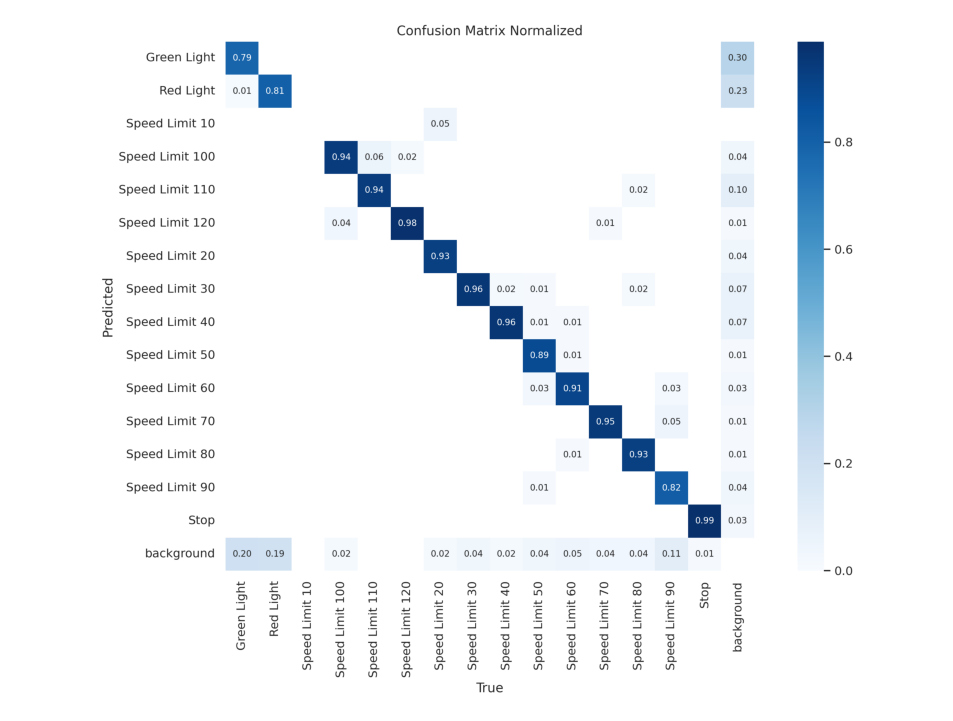

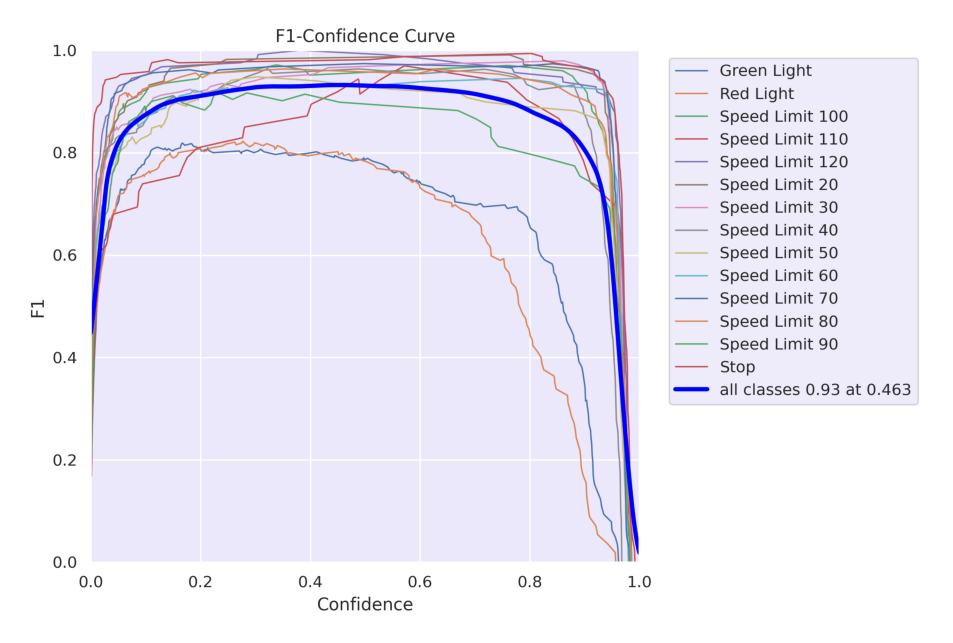

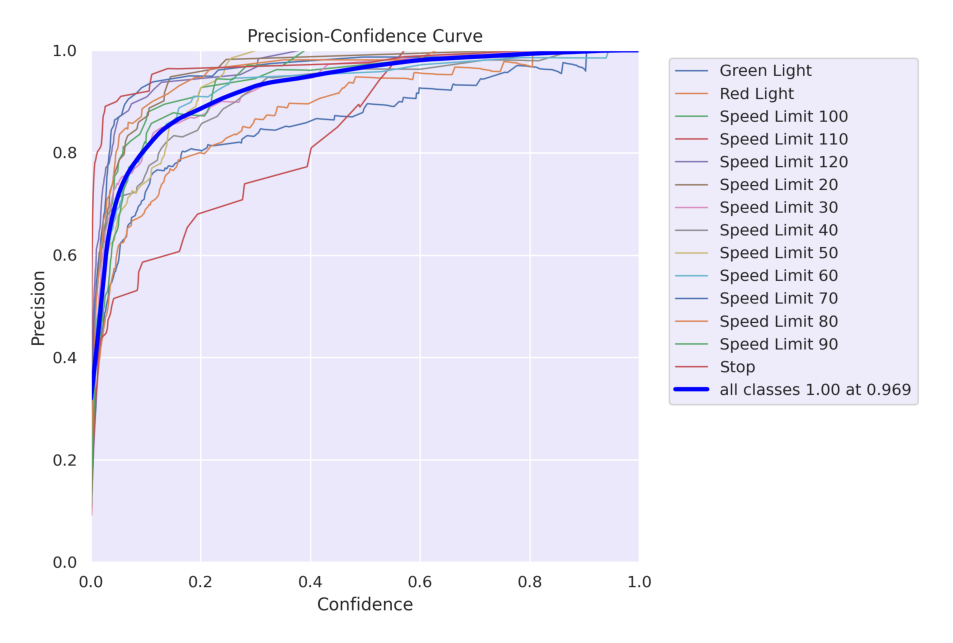

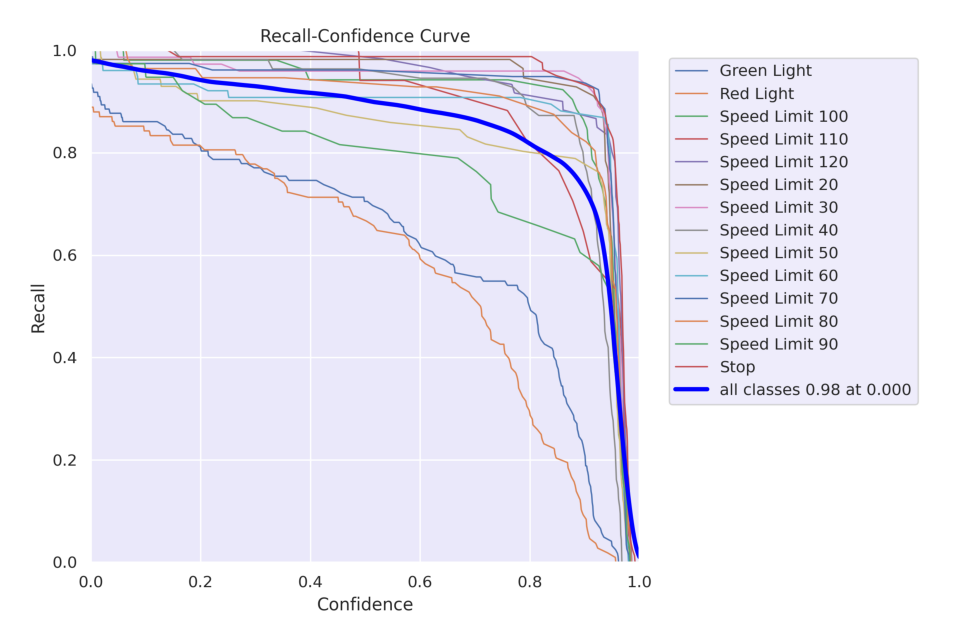

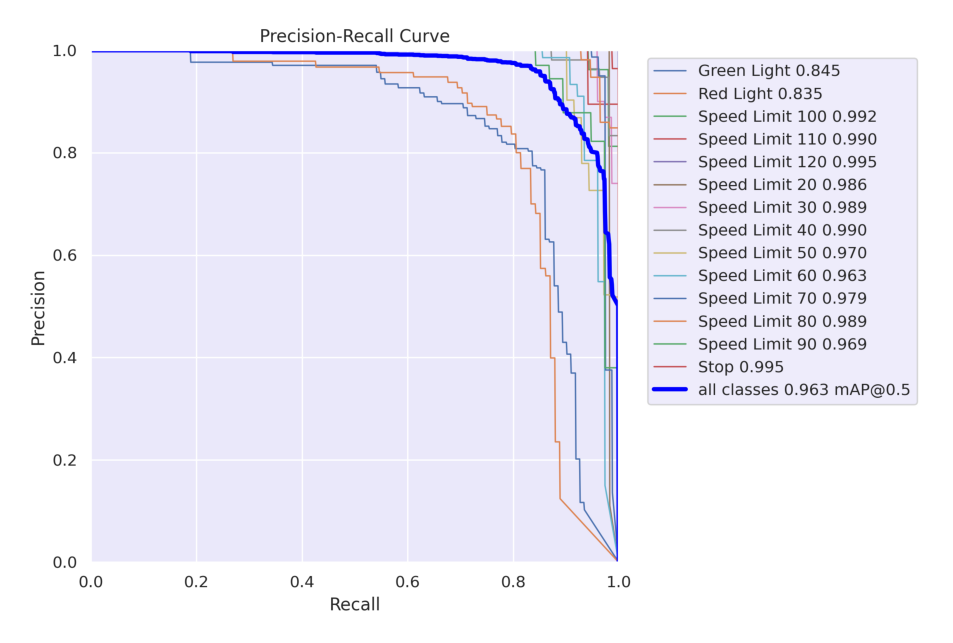

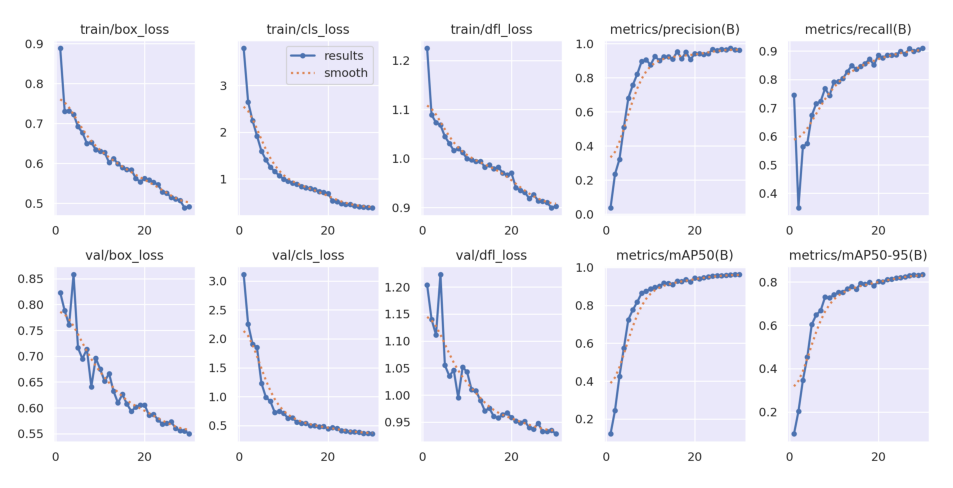

In [35]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        # Check if the image file exists before reading it
        if not os.path.exists(image_path):
            print(f"Error: Image file not found: {image_path}")
            continue  # Skip to the next image

        img = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Error: Could not read image: {image_path}")
            continue  # Skip to the next image

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi = 120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display

image_files = [
    '/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png',
    '/kaggle/working/runs/detect/train2/F1_curve.png',
    '/kaggle/working/runs/detect/train2/P_curve.png',
    '/kaggle/working/runs/detect/train2/R_curve.png',
    '/kaggle/working/runs/detect/train2/PR_curve.png',
    '/kaggle/working/runs/detect/train2/results.png'
]

# Path to the directory containing the images

post_training_files_path = '/kaggle/working/runs/detect/train2'

# Display the images
display_images(post_training_files_path, image_files)

In [36]:
import pandas as pd
import os

# List the directories within 'runs/detect' to find the correct training directory.
training_directories = [f for f in os.listdir('runs/detect') if f.startswith('train')]

# Select the most recent training directory (usually the one with the highest number).
latest_training_directory = sorted(training_directories)[-1]

# Construct the full path to the 'results.csv' file.
results_file_path = os.path.join('runs/detect', latest_training_directory, 'results.csv')

# Read the 'results.csv' file into a pandas DataFrame.
Result_Final_model = pd.read_csv(results_file_path)

Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21   976.496         0.55947         0.54641         0.94429   
21     22  1019.590         0.55790         0.52053         0.93293   
22     23  1064.550         0.54106         0.48374         0.92936   
23     24  1111.490         0.52940         0.46816         0.92558   
24     25  1154.740         0.53554         0.44810         0.92299   
25     26  1199.250         0.51396         0.43424         0.91195   
26     27  1245.130         0.53188         0.42910         0.91339   
27     28  1288.400         0.50474         0.40064         0.90927   
28     29  1332.100         0.49139         0.40077         0.90757   
29     30  1375.650         0.48861         0.38877         0.90152   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.95108            0.85540           0.94375   
21               0.94786            0.86255           0.94518   
22               0.92790            0.87964           0.95133   
23               0.96658            0.87435           0.95442   
24               0.94276            0.89701           0.95686   
25               0.93151            0.89968           0.95639   
26               0.95066            0.89291           0.95566   
27               0.91997            0.90379           0.95708   
28               0.94718            0.88289           0.95678   
29               0.93638            0.89639           0.95832   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80308       0.60203       0.46109       0.96475  0.000179   
21              0.80788       0.58511       0.44198       0.95160  0.000161   
22              0.81713       0.58364       0.42100       0.94886  0.000144   
23              0.81581       0.57866       0.40732       0.95066  0.000127   
24              0.82300       0.58080       0.39620       0.94944  0.000109   
25              0.82411       0.57646       0.39015       0.94555  0.000092   
26              0.82449       0.57004       0.38040       0.94188  0.000075   
27              0.82656       0.56377       0.37680       0.93660  0.000057   
28              0.82890       0.56170       0.37256       0.93758  0.000040   
29              0.82875       0.56064       0.36510       0.93711  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

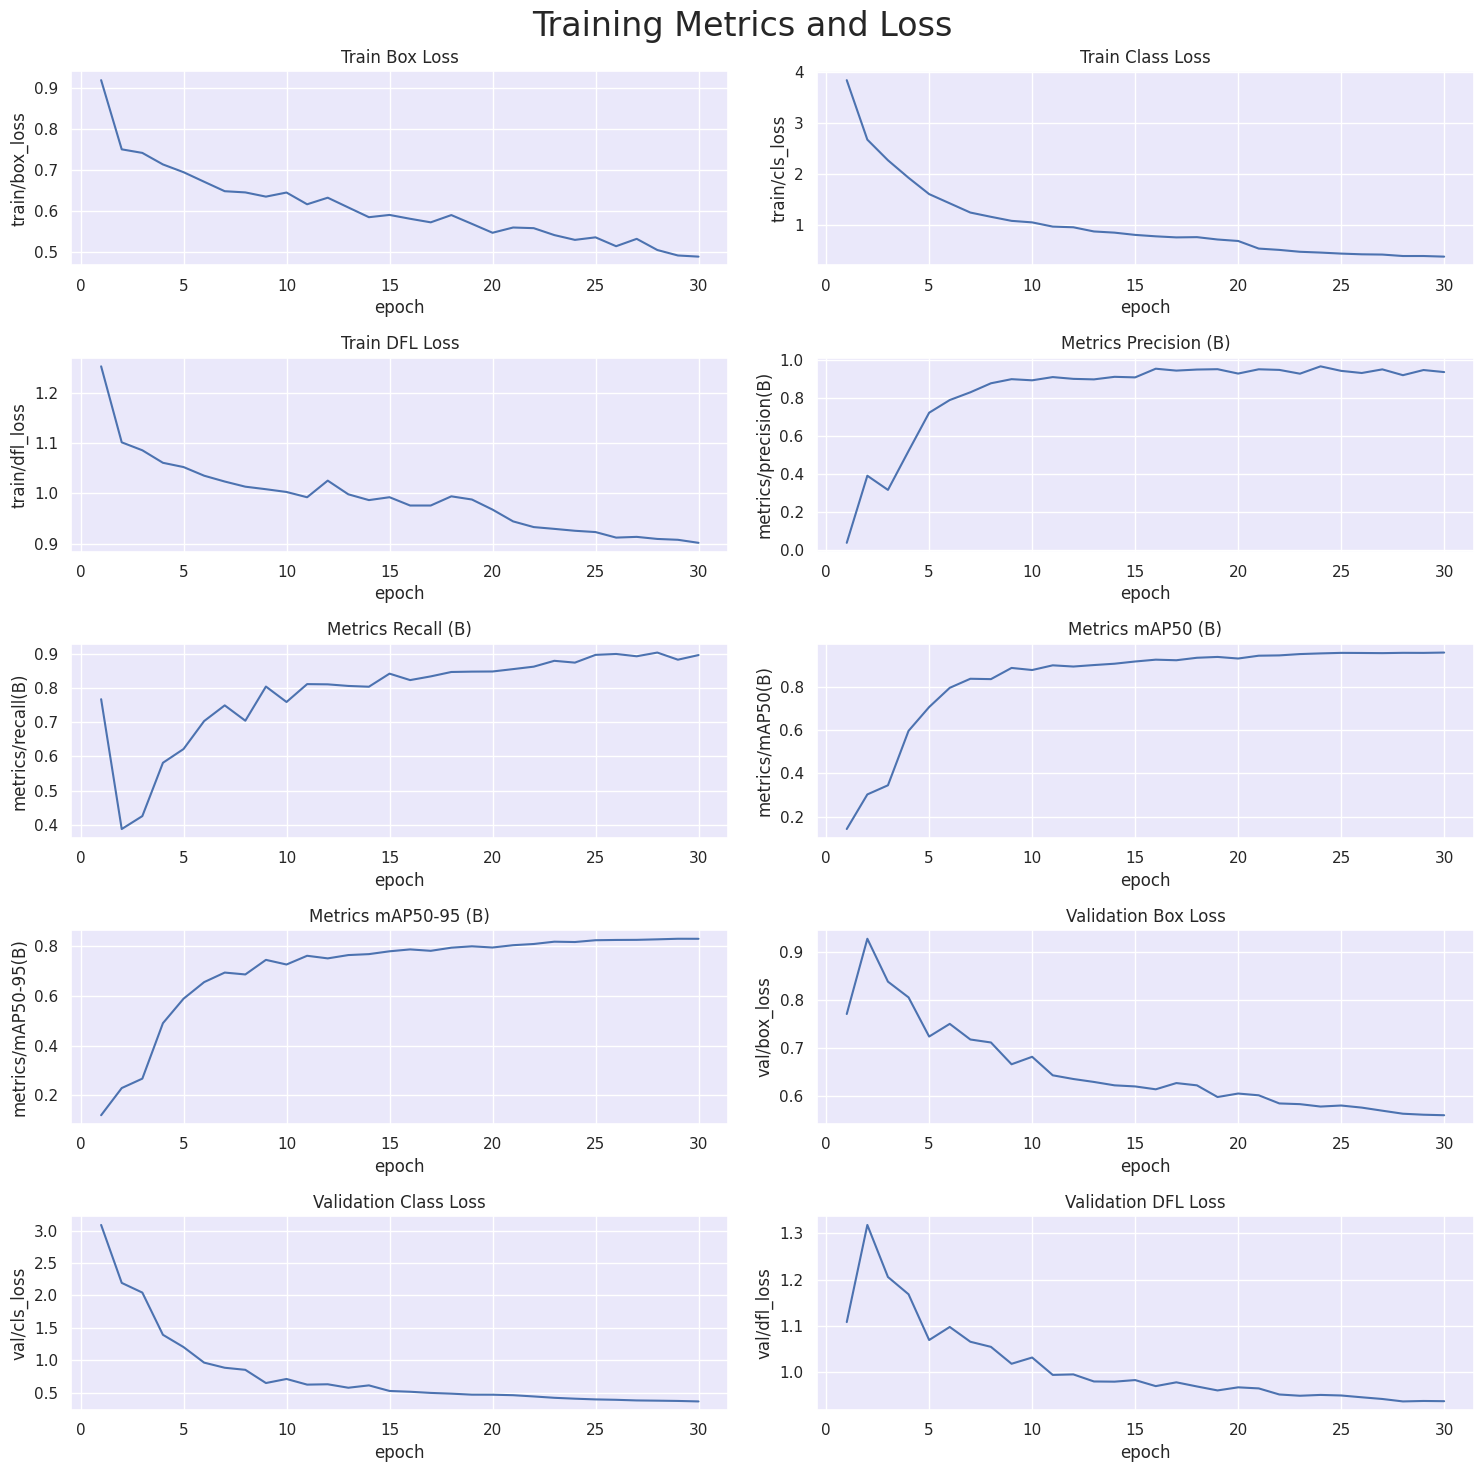

In [37]:
# Reading the results.csv file as a pandas dataFrame

Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Creating subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plotting the columns using seaborn

sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle("Training Metrics and Loss", fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

**Validation of the model by Testset**

In [38]:
# Loading the best performing model
ValidModel = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

# Evaluating the model on the ValidSet
metrics = ValidModel.val(split = 'val')

# Final Results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 588.96it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  6.73it/s]


                   all        801        944      0.961      0.909      0.963      0.835
           Green Light         87        122      0.861      0.709      0.837      0.488
             Red Light         74        108      0.937      0.693      0.834      0.545
       Speed Limit 100         52         52      0.969      0.942      0.991      0.881
       Speed Limit 110         17         17       0.87          1      0.992      0.923
       Speed Limit 120         60         60          1      0.991      0.995      0.921
        Speed Limit 20         56         56       0.99      0.982      0.986      0.871
        Speed Limit 30         71         74      0.975      0.959      0.989      0.917
        Speed Limit 40         53         55      0.961      0.964       0.99      0.886
        Speed Limit 50         68         71          1      0.873      0.971      0.866
        Speed Limit 60         76         76      0.956      0.908      0.963      0.873
        Speed Limit 7

**Making predictions on Test Images**


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 1 Speed Limit 110, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.3ms
Speed: 2.1ms pr

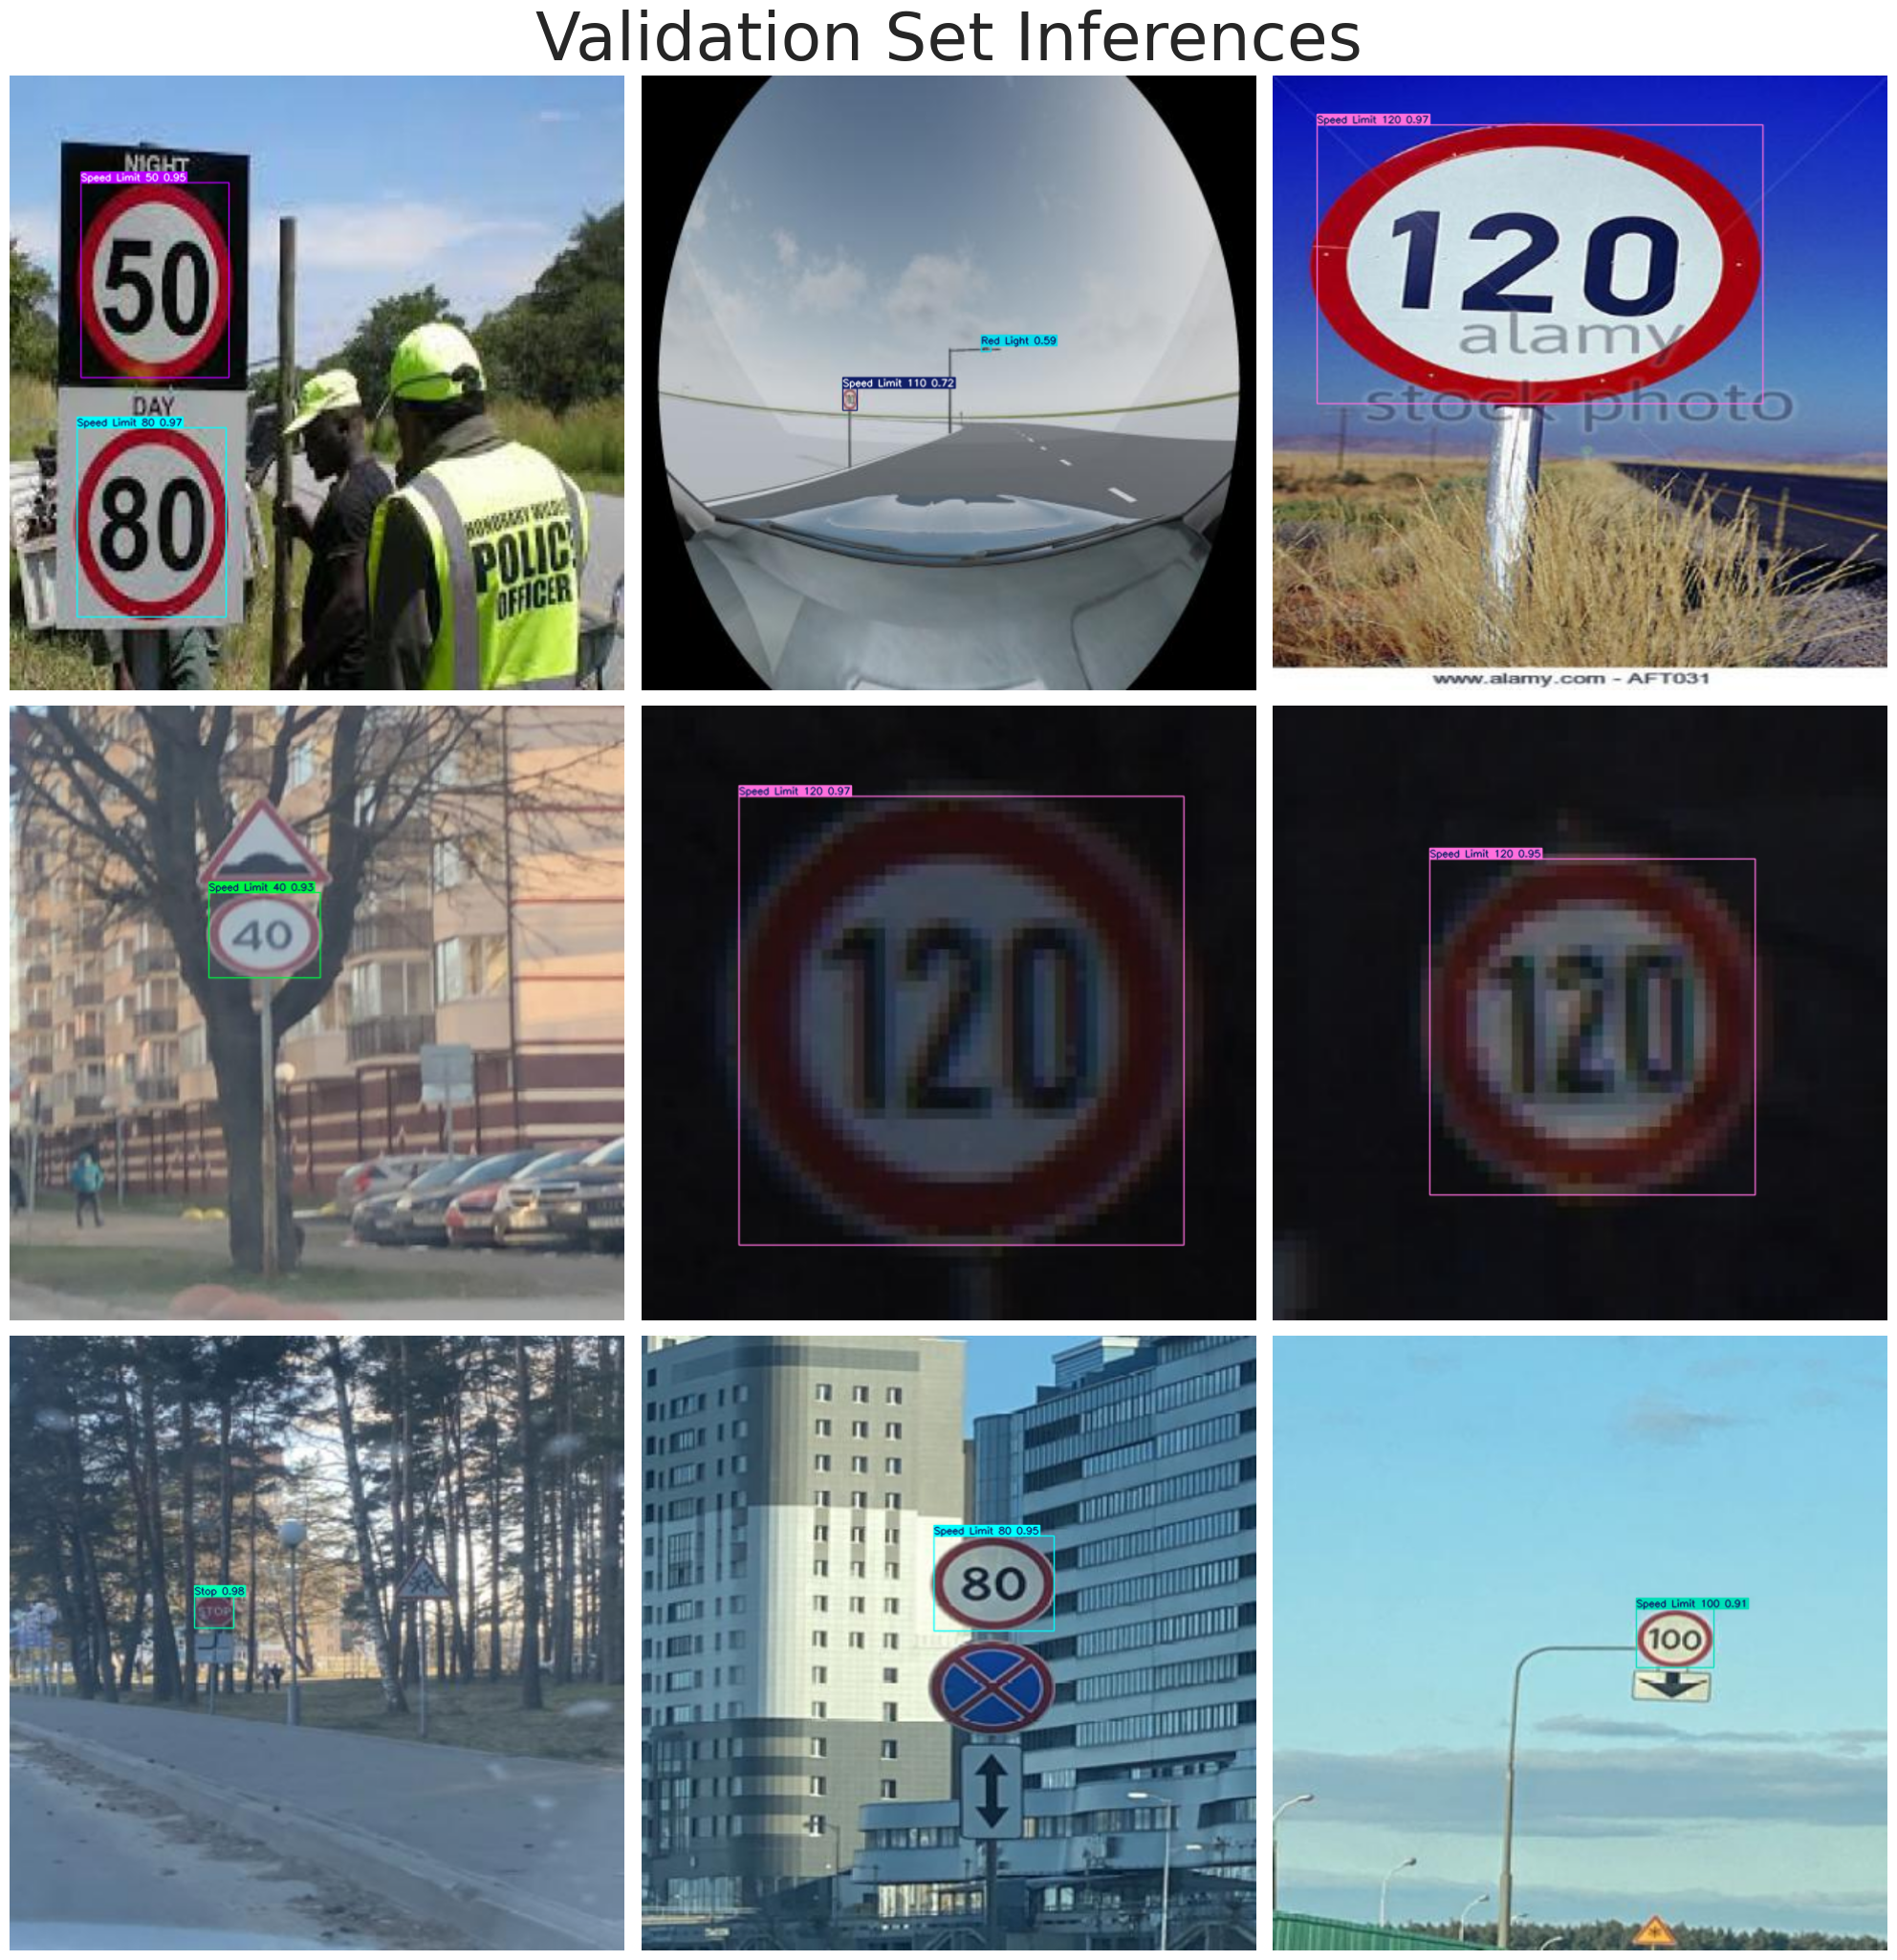

In [39]:
# Normalization function
def normalize_image(image):
    return image/255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to Validaion images
path = '/kaggle/input/traffic-signs-data-set/Traffic Signs Detection Dataset/car'

# Place path here
valid_images_path = os.path.join(path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
  # Select 9 images at equal intervals
  num_images = len(image_files)
  step_size = max(1, num_images // 9)
  # Ensure the interval is at least 1
  selected_images = [image_files[i] for i in range(0, num_images, step_size)]

  # Prepare subplots
  fig, axes = plt.subplots(3, 3, figsize=(20, 21))

  fig.suptitle('Validation Set Inferences', fontsize = 50)

  for i, ax in enumerate(axes.flatten()):
      if i < len(selected_images):
          image_path = os.path.join(valid_images_path, selected_images[i])
          # Load Image
          image = cv2.imread(image_path)
          # Check if the image is loaded correctly
          if image is not None:
              # Resize image
              resized_image = resize_image(image, size=(640, 640))
              # Normalize image
              normalized_image = normalize_image(resized_image)
              # Convert  the normalized image to uint8 data type
              normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
              # Predict with the model
              results = ValidModel.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
              # Plot the image with labels
              annotated_image = results[0].plot(line_width=1)
              annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
              # Display the image
              ax.imshow(annotated_image_rgb)
              ax.axis('off')
          else:
              print(f'Failed to load image {image_path}')
  plt.tight_layout()
  plt.show()
else:
  print("No images found in the directory.")


